In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [28]:
dt=pd.read_csv("spam.csv",encoding='ISO-8859-1')
dt

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [29]:
dt.shape

(5572, 5)

In [30]:
dt.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2844,ham,Will be out of class in a few hours. Sorry,NaN,NaN,NaN
2949,ham,Where are you ? You said you would be here whe...,NaN,NaN,NaN
4742,ham,I am in hospital da. . I will return home in e...,NaN,NaN,NaN
2564,ham,"Under the sea, there lays a rock. In the rock,...",NaN,NaN,NaN
4801,ham,Reverse is cheating. That is not mathematics.,NaN,NaN,NaN


In [31]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [32]:
dt.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [33]:
dt

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [34]:
dt.sample(5)

,v1,v2
3169,ham,"Mah b, I'll pick it up tomorrow"
2468,ham,Lol well don't do it without me. We could have...
5508,ham,"Machan you go to gym tomorrow, i wil come lat..."
4570,ham,\CHA QUITEAMUZING THATåÕSCOOL BABE
2225,ham,Alrite jod hows the revision goin? Keris bin d...


In [35]:
dt=dt.rename(columns={'v1':'target','v2':'text'})

In [36]:
dt.sample(5)

,target,text
776,ham,Why don't you go tell your friend you're not s...
114,ham,"Wa, ur openin sentence very formal... Anyway, ..."
531,ham,What Today-sunday..sunday is holiday..so no wo...
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
281,ham,\Wen u miss someone


In [37]:
dt['target'].unique()

array(['ham', 'spam'], dtype=object)

In [40]:
encoder=LabelEncoder()
dt.target=encoder.fit_transform(dt.target)

In [43]:
dt.sample(10)

,target,text
2348,0,That seems unnecessarily affectionate
2787,0,"Forgot it takes me 3 years to shower, sorry. W..."
4741,0,Ya very nice. . .be ready on thursday
2545,0,So are you guys asking that i get that slipper...
2792,0,Not from this campus. Are you in the library?
182,0,ok. I am a gentleman and will treat you with d...
4103,0,Do u hav any frnd by name ashwini in ur college?
1780,1,BIG BROTHER ALERT! The computer has selected u...
1010,0,Lol I would but my mom would have a fit and te...
4144,0,Lol I would but despite these cramps I like be...


In [45]:
dt.isnull().sum()

target    0
text      0
dtype: int64

In [47]:
dt.duplicated().sum()

403

In [49]:
dt=dt.drop_duplicates(keep='first')

In [50]:
dt.shape

(5169, 2)

In [52]:
dt.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
dt.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [71]:
label_counts=dt.target.value_counts()

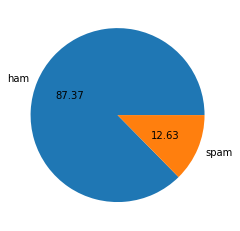

In [72]:
plt.pie(label_counts,labels=['ham','spam'],autopct='%.02f')
plt.show()

In [70]:
dt['number_of_char']=dt['text'].apply(len)
dt.head()

,target,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
